# El Problema de los Tres Cuerpos
Por: Daniel Martínez y Fernanda Pérez

### 1. Introducción

Uno de los problemas físicos que continúan abiertos hasta la actualidad es el *problema de los tres cuerpos*, que consiste en resolver las ecuaciones de movimiento de tres cuerpos sometidos a sus campos gravitacionales. El carácter irresoluble de las ecuaciones hizo que durante 300 años físicos y matemáticos intensaen encontrar una solución en términos de funciones fundamentales, pero tal cosa nunca ocurrió. 

Newton ofreció, en 1665, una solución aproximada al sistema formado por la Tierra, la Luna y el Sol. Sus conclusiones concordaban con los datos experimentales en un 92%. Euler (1767) y Lagrange (1772) hicieron lo propio aportando soluciones particulares al problema general.

### 2. Ecuaciones de Movimiento

Las ecucaciones de movimiento se reescriben como un sistema de ecuaciones de segundo orden acopladas:

$\dot{\vec{x_1}} = \vec{v_1}$

$\dot{\vec{x_2}} = \vec{v_2}$

$\dot{\vec{x_3}} = \vec{v_3}$

$\dot{\vec{v_1}} = G \frac{m_2}{||\vec{x_1} - \vec{x_2}||^3} (\vec{x_1} - \vec{x_2})  + G \frac{m_3}{||\vec{x_1} - \vec{x_3}||^3} (\vec{x_1} - \vec{x_3}) $

$\dot{\vec{v_2}} = G \frac{m_1}{||\vec{x_2} - \vec{x_1}||^3} (\vec{x_2} - \vec{x_1})  + G \frac{m_3}{||\vec{x_2} - \vec{x_3}||^3} (\vec{x_2} - \vec{x_3}) $

$\dot{\vec{v_3}} = G \frac{m_1}{||\vec{x_1} - \vec{x_3}||^3} (\vec{x_1} - \vec{x_3})  + G \frac{m_2}{||\vec{x_3} - \vec{x_2}||^3} (\vec{x_3} - \vec{x_2}) $

Como método de integración, elegimos una versión modificada del Método de Taylor, valiéndonos de la paquetería ```TaylorSeries.jl```. Todo ha sido escrito en un archivo adicional llamado ```ProyectoFinal.jl```, donde se incluyen funciones necesarias para las animaciones.

### 3.  Órbitas Periódicas

Para la resolución de las ecuaciones de movimiento, se eligieron sets de condiciones iniciales. Posteriormente se hicieron variaciones pequeñas de una condición inicial (por ejemplo la velocidad de arranque del tercer cuerpo) y se dispusieron en un gráfico coloreado según su valor. Del patrón de posiciones hallados en los gráficos, se eligieron los valores iniciales que consideramos contruían una trayectoria "estable" al rededor del sistema, para realizar una animación.

### 4.  Cálculo de la Energía

Como una estimación de la energía del sistema, la cual está dada por.

$$ E_t = \sum_{j=1}^{3}E_j$$

donde cada energía está dada por:

$$ E_j = \frac{1}{2}mv_j^2 - \sum_{k\neq j}\frac{Gm_jm_k}{|r_k - r_j|}$$




In [2]:
include("ProyectoFinal.jl") #Importamos las funciones que escribimos

Integrador_Restringido (generic function with 2 methods)

## Observaciones en configuración triangular

Antes, tomemos el ejemplo más sencillo, tres partículas con la misma masa en una circunferencia unitaria y equdistantes, con esto notaremos si el integrador funciona realizando pequeños cálculos de energía y momento angular.

In [3]:
#Tambien probamos si nuestra función CalculaCM obtiene una configuración tal que el centro de masa quede en el 
#origen
Cuerpo1 = [1., 1.0, 0.0,0., 0.,-1.,0.]
Cuerpo2 = [1, -0.5,sqrt(3)/2,0., sqrt(3)/2, 0.5,0.]
CondicionesIniciales1 = CalculaCM(Cuerpo1, Cuerpo2, 1.)

3-element Array{Array{Float64,1},1}:
 [1.0,1.0,0.0,0.0,0.0,-1.0,0.0]                                  
 [1.0,-0.5,0.8660254037844386,0.0,0.8660254037844386,0.5,0.0]    
 [1.0,-0.5,-0.8660254037844386,-0.0,-0.8660254037844386,0.5,-0.0]

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in vect at abstractarray.jl:32
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/feruchan/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/feruchan/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[4], in expression starting on line 15
 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in vect at abstractarray.jl:32
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/feruchan/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/feruchan/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[4], in expression starting on line 16


<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQACB49tZGF0AAACoAYF//+c3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0MiAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTQgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz02IGxvb2thaGVhZF90aHJlYWRzPTEgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAADCVliIQAK//+9nN8CmtHM5UuBXb3ZqPl0JLl+xBg+tAAAAMAAAMAAAMACqPWFhTYu68NQAAAAwAvgAsSSc67nAGACaD4n3bMsn3/PMHDNOAnhZ5iURPSEYiOA6qaLwyXX5g4KJcBYijja7ml+L+Jj/lJsZg+WleOiMCK/Ihz6nPegdtybxwemwB9LheeBFelzVlh8Wt/Ml/EQJZ66tBa9IXX7grhqDHcvXzVMoLnUXKZGdtj1rmVGdgOYt7zw7zexqy65NNPrsAgle+EN0fuZfdxy++xPyafbvbNnvObfpcV3LBg3O2qCnj+oFn+L0TmLMMJHhrfZ9RslvZ9x7yUZOvuvFwukFdbhZ+A5nMFKbF0x1sZPSDEgTELjNX8cSuuYi2097JbJ4ZiiEnED0BAhX12NL3h1P5nWyfLdHEa6FgWHLdK6OfRkw0Q9Dw9XWPU4DqiJK161JU7DBTTF7zpZKctrIkpAsABHFzjqIAAABBmT5onb4OMFlZfqnTGPBPwFqlBbZ8K+qopBQoi/d5weDOtoctZq3J5OYh0Do4UIj/GEgzXxCOnJcH+VGgAAii+V8dr10RFctKhbdL3poStAFck7TM77XrBXvRMK3AttsccTrtQ3p8fEdIQGXurHmrktuQVcsrpINVyZcsR9IHslxcR9dtuiMHfLNuIfvpl+RTWy6MXV8LvA8CMYXF3Ogh3VaIIKUZzep+eY4z54XU3tZ7uvfX/X6qSJvWCHL5rx3Y/7/JgAAMqNDX97W+wCqU5Ym2JBee2PK7BelJGKOiLLwAVthWsA5TBeg6FYaJABrzsha/TPvaKizQBuwZ4Fkp33C+p9sx2N8OeinsvsYMz7K69o9YtUXlQliJZm62KDiVoZNVN66prMWfs+Y9IUdLSNg5oVVHObM/WhXrboAAMI0Atm3G1wF/oHaBV6JbFn+ZKv4J3ThI/yC8gYPTbftrKiWjk2aTVYaihRn0DOnenmulCZy2E2bpRfzjcKNHr7CEHFjGqO0yav3FaF4cRtzryAAadHFKZT0xH3dQcBUKMIf5ae1aG3AAgYE2AHrP1zlbYjmh/48TMdKYoNAnXsx4JWNLDpelAwjC7yToyc/7bsFbWyULqLfTPRhumdy197Z43UMJFB9A8qSNghuAb819hvs5+u9SavUsGYm7Kngu3jHhi0D9+dLFSQ/VNNNtMmPhtYMPAHt7CEuC4/f5FX3IANApK0xOT+MvLV+C857bfG9ZN82feSxlkRDTUKwtSQInx5Rucekin7YD8NmJoMbD3nyoLHnPCJEZas4OhlHPaG5YZnZiDdA8H26oQAAloD9AHAuwCEoUT3+Nm6qefHIzlP1iZy5uchQlymWUYnG/jROHMXdiTLt8LhDDUNVcZBc3rOwCIC7dlMTk7pKeWJQ5yiGGoBszdKyT8uTdKlPESKU9iAbeV1787fcv4fKeeS6+Bxefg9HcoqV/NOhYRI2sEAAKcUVwcuBZODZve/iVUJVjLgFBRwOh2pgK6o9lAKuBkgDkCGu4SLse9Tq8LIwWWqSalpKpG1j0+m2blgA1E0XaGxOb8qQ3Uybruup0c55H0bfxjAOV+v8pk6UaGcg85k5u+I/o2pXkEhRlCTs5EXfjTP5WTKaIiN7VCvoaGbg2ubiOCCWihxKog20v8+bbUw/a7SRh3l+baYgE28/NIOLDIf0Dv9qr13SaAEQWD4pziWmv8tpRjAJ2Cd/WTO1fqjnf+5pqfVbbykCDVTcDlOL8xfJCdAyyyGqpbbLAoUKHl3RPJi/S4M0dSQrwCZ8MjsvZBp2vx9rKKxSUopM+gPXZNs0WGz+DCZUg98HKWhGP1MyLYPHbBp2VHBqGo14u/PwcefKD6WskbADv83Cx965zT0lxY1AnrWeejccXNnldklh1JBg+6wMvG8C3O+qZArIbvy5D76IXr1WZs6MGxx/s0WBTQaMQEYgJb/51PnyLMwYpLpDkbDT28VBng3AZBOEyP2N+7xRbgNthtfJn5C3BcyP7dkxJK2uqPHxyf3ucwokhu5CYjSn/z5rSE0NrkGZqC5HhVAGLKPYQ9tGRiSJy2hFVGgo7yS+3dXPbyhKnpYMLsdoAa5q00i7NiEJ2cF53X8RseIlR/sJNNUAAJCY1jVE084dE9Mx+vjniC4yAcvMUlrhaTdmzBjTDxwai5cRq7+QbDtj/3gMzcJrETxu4shP1fwiPoCEpW8jMNbGtPttAba7h83UB9oj8sKOOAABwpVrEwfxnbKImMYJ/3cr17UWqxGQAFeA4QB54k9ptOXUybQQ5CexUY9o9fpY1SE6FjlRPruZzE/q1A53Qcvxq8/grqb9lq29QcTXOqfM6pZzll2SCtACUYoQ5fgSg8n4hP579mQARgcvADMZGYdSDpQja9m7UOF7TLu2C8DfTyIa8gu+GzjziSsFMELW4G8+RL/+OWf+LlgaXu9oQlN6kzrWRjSlt57Yvb73Y3dDjjHFynsXCYbslsHKlbjnMYt9QeW8fz6VqRBGR04AAAAwJc+uwYRtyoMtIGbgT4ohtQdHvgkeku9D6bGoAGdAkgBFnKuMM/cPzcnimhVcSzoiCPRgp9wYMjcGagmbuesYpCyA3eTb/7b8wtw/aDBVcfLFO+mABNfLZQuVzaSjgZ8GRJNrIXLIho/S/w0fZ/1H7omU+Xt/H0cSJcPYH7EifhK+onx0NAG+Zab2y1GyNdYPI+HRvFjALWFyoJbwgQI51QZmYi1fq5uGwwuIEPN0h8bC7pdvQBh9uwtS+7nF7D2S2n+BKvihX1LrWUdMQs+0dxJv0t/qtl/N8S/5FzmU6LQixl4wXf70e8xOsSfFxECqzpl4LOpqeRjQzgfPgfujP6GVKN/5VA2qPuw073t9BsGm3IN2Kvf0mkhj6Ptu50oX1JGHnAVhc4cGfF/bEUfkxxz8loK+qsqBqyI9g5c/6WPTeUoNyYAc0PN0kGkdIY9Sfr7qE+BV0/I9kigOaii55

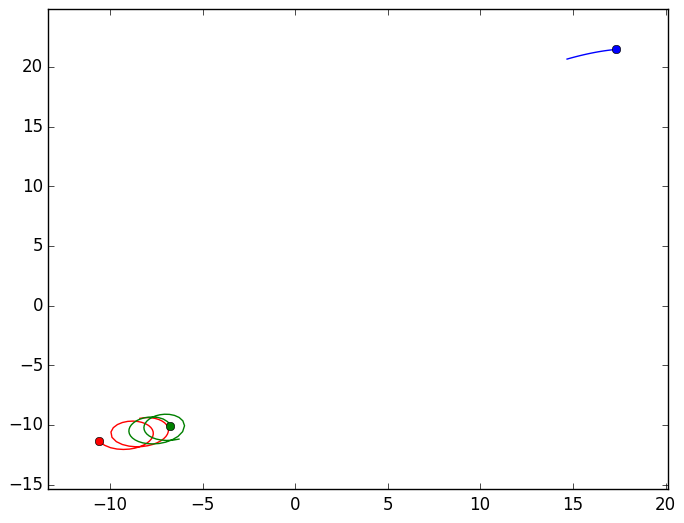

In [4]:
#Ahora usamos el integrador para obtener la solución numérica posteriormente crear una animación
time, C1, C2, C3 = Integrador3(CondicionesIniciales1, 500.)

r1x = [x[1] for x in C1[1]]
r2x = [x[1] for x in C2[1]]
r3x = [x[1] for x in C3[1]]
r1y = [x[2] for x in C1[1]]
r2y = [x[2] for x in C2[1]]
r3y = [x[2] for x in C3[1]]

#Todo éste código es para animar de una forma bonita


#Find Axis Limits
xmin = minimum([r1x,r2x,r3x])
xmax = maximum([r1x,r2x,r3x])
xmin, xmax = xmin - 0.1(xmax-xmin), xmax+ 0.1*(xmax-xmin)
ymin = minimum([r1y,r2y,r3y])
ymax = maximum([r1y,r2y,r3y])
ymin, ymax = ymin - 0.1(ymax-ymin), ymax+ 0.1*(ymax-ymin)

#Construct Figure and Plot Data
fig = figure()
ax = plt[:axes](xlim = (xmin,xmax),ylim=(ymin,ymax))
global line1 = ax[:plot]([],[],"r-")[1]
global line2 = ax[:plot]([],[],"g-")[1]
global line3 = ax[:plot]([],[],"b-")[1]
global p1 = ax[:plot]([],[],"or")[1]
global p2 = ax[:plot]([],[],"og")[1]
global p3 = ax[:plot]([],[],"ob")[1]

function init()
    global line1
    global line2
    global line3
    global p1
    global p2
    global p3
    line1[:set_data]([],[])
    line2[:set_data]([],[])
    line3[:set_data]([],[])
    p1[:set_data]([],[])
    p2[:set_data]([],[])
    p3[:set_data]([],[])
    return (line1,line2,line3,p1,p2,p3,None)
end

step = 1
function animate(i)
    k = i + 1
    global line1
    global line2
    global line3
    global p1
    global p2
    global p3    
    line1[:set_data](r1x[max(1,step*(k-50)):(step*k)],r1y[max(1,step*(k-50)):(step*k)])
    line2[:set_data](r2x[max(1,step*(k-50)):(step*k)],r2y[max(1,step*(k-50)):(step*k)])
    line3[:set_data](r3x[max(1,step*(k-50)):(step*k)],r3y[max(1,step*(k-50)):(step*k)])
    p1[:set_data]([r1x[step*k]],r1y[step*k])
    p2[:set_data]([r2x[step*k]],r2y[step*k])
    p3[:set_data]([r3x[step*k]],r3y[step*k])
    return (line1,line2,line3,None)
end

#Call the animator.
myanim = anim.FuncAnimation(fig, animate, init_func=init, frames=ifloor(length(time)/step), interval=20)

#This will require ffmpeg or equivalent.
myanim[:save]("Triangulos.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])

function html_video(filename)
	base64_video = base64(open(readbytes, filename))
	"""<video controls src="data:video/x-m4v;base64,$base64_video">"""
end

display("text/html", html_video("Triangulos.mp4"))

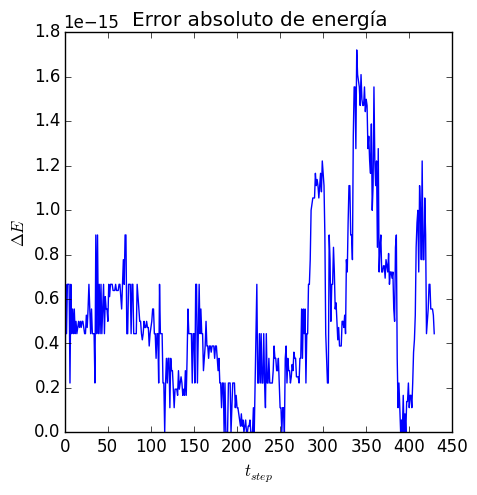

In [6]:
#Ahora, calculemos la energía del sistema a cada paso del tiempo y grafiquemos el error absoluto con respecto al 
#valor de energía para la condición inicial

#Calcula la energía
EC = Energia_3(C1, C2, C3, [1.,1.,1.])
ΔEC = Float64[abs(x - EC[1]) for x in EC]
figure(figsize = (5,5))
plot(ΔEC)
title("Error absoluto de energía")
xlabel(L"t_{step}")
ylabel(L"\Delta E")
show()

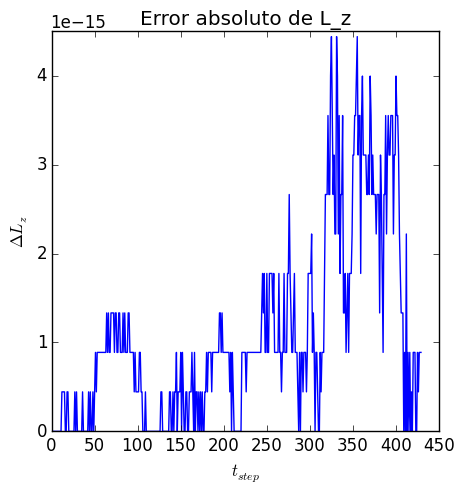

In [7]:
#Ahora, hagamos lo mismo con el momento angular

AM = Angular_3(C1, C2, C3, [1.,1.,1.])
ΔAM = Float64[abs(x[3] - AM[1][3]) for x in AM]
figure(figsize = (5,5))
plot(ΔAM)
title("Error absoluto de L_z")
xlabel(L"t_{step}")
ylabel(L"\Delta L_z")
show()

Hasta ahora todo marcha bien, pues los errores absolutos de la energía y del momento son del orden de $\sim 10^{-15}$, ahora hagamos barridos sobre distintas condiciones iniciales, cambiando uno de los parámetros.

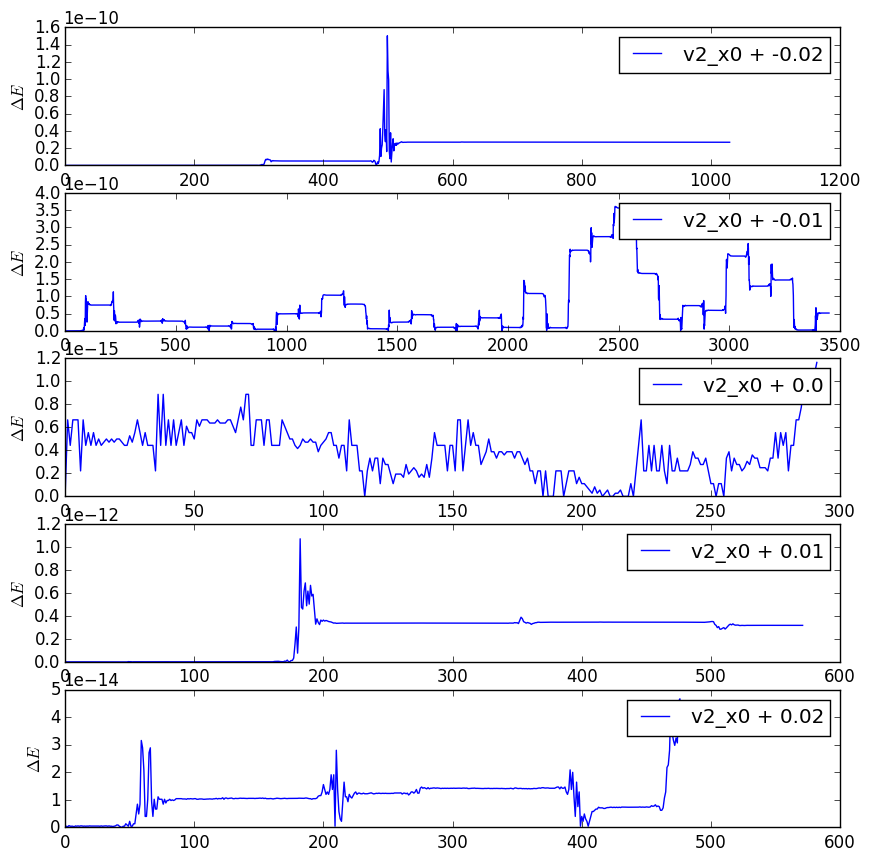

In [8]:
EnergiaTriangulos = []
AngularMomentum = []
Posiciones =[]
Velocidades = []
intervalo = collect(-0.2:0.01:0.2)
prueba1_masas = [1., 1., 1.]
for x in intervalo
    Cuerpo1 = [1., 1.0, 0.0,0., 0.,-1.,0.]
    Cuerpo2 = [1, -0.5,sqrt(3)/2,0., sqrt(3)/2 + x, 0.5,0.]
    CondicionesIniciales1 = CalculaCM(Cuerpo1, Cuerpo2, 1.)
    
    ts1, c11, c21, c31 = Integrador3(CondicionesIniciales1, 400.)
    E = Energia_3(c11,c21,c31, prueba1_masas)
    L = Angular_3(c11,c21,c31, prueba1_masas)
    push!(EnergiaTriangulos, E)
    push!(AngularMomentum, L)
    Temp = typeof(c11[1])[c11[1],c21[1],c31[1]]
    Temp2 = typeof(c11[2])[c11[2],c21[2],c31[2]]
    push!(Velocidades, Temp2)
    push!(Posiciones, Temp)
end

ΔE = []
ΔL = []
#Rutina para calcular errores absolutos
for j in 1:length(EnergiaTriangulos)
    E0 = EnergiaTriangulos[j][1]
    
    temp = Float64[abs(E0 - x) for x in EnergiaTriangulos[j]]
    push!(ΔE, temp)
    
    L0 = AngularMomentum[j][1]
    temp2 = Float64[norm(L0 - x) for x in AngularMomentum[j]]
    push!(ΔL, temp2)
end

figure(figsize = (10,10))
for j in 19:23
    subplot(5,1,(j - 18))
    
    plot(ΔE[j], label = "v2_x0 + $(intervalo[j])")
    legend()
    ylabel(L"\Delta E")
end

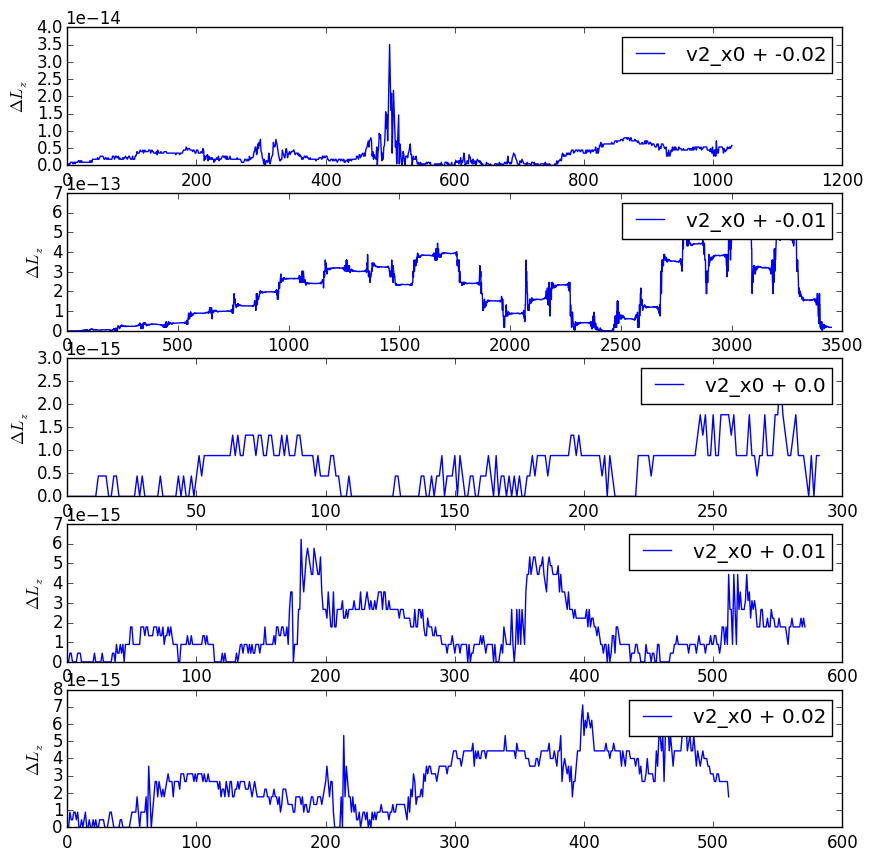

In [9]:
figure(figsize = (10,10))
for j in 19:23
    subplot(5,1,(j - 18))
    plot(ΔL[j], label = "v2_x0 + $(intervalo[j])")
    legend()
    ylabel(L"\Delta L_z")
end

Como vemos, el sistema es muy sensible ante cambios de parámetros (en éste caso, la componente x de la velocidad inicial del cuerpo 2), pues el error de la energía llega aumentar en dos órdenes de magnitud.

## Segunda Configuración: Un "ocho"

La segunda configuración que utilizaremos es aquella tal que las tres partículas describan una órbita en forma de ocho, como en el caso anterior, revisaremos el cambio absoluto de la energía y de la componente $z$ del momento angular para comprobar que la órbita es estable

In [10]:
#Tambien probamos si nuestra función CalculaCM obtiene una configuración tal que el centro de masa quede en el 
#origen, esta configuración es la de un ocho"
Cuerpo12 = [1., 0.97000436, -0.24308753,0., 0.46620369, 0.43236573,0.]
Cuerpo22 = [1., 0.,0.,0., -0.93240737, -0.86473146,0.]
Cuerpo32 = [1., -0.97000436,0.24308753,0., 0.46620369, 0.43236573,0.]
CondicionesIniciales2 = typeof(Cuerpo12)[Cuerpo12, Cuerpo22, Cuerpo32]



3-element Array{Array{Float64,1},1}:
 [1.0,0.97000436,-0.24308753,0.0,0.46620369,0.43236573,0.0]
 [1.0,0.0,0.0,0.0,-0.93240737,-0.86473146,0.0]             
 [1.0,-0.97000436,0.24308753,0.0,0.46620369,0.43236573,0.0]

In [11]:
time2, C12, C22, C32 = Integrador3(CondicionesIniciales2, 100.)
length(time2)

915

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAK99dtZGF0AAACoAYF//+c3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0MiAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTQgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz02IGxvb2thaGVhZF90aHJlYWRzPTEgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAADxdliIQAM//+9uy+BTX9n9CXESzF2kpwPiqkgIB3NMAAAAMAAAMAAAMAA0AdraId2gkE0AAAAwAL8AKKl/3We5nzAJffvNG2j0cDjHm63xYBOR7oMKk0zAiN/MHdBfynKcxlXdcqTK1XmoSmsTWU8jn8qGgdUYFwTFyQ9NVC3aJprVgH7JNegWuwHaY7brqe1X9jjOhwlwG2rfTIXzWI59rPvbvoWkbJTnE/NwXjTyxc/HLQ4Ase8J1XfiA+5EeU9Rt68Da7juVfVgn0wieK3kPwx4cjZIEMkidEI2nG8XDeJnDkU8VUEuPP2swcDXYfUC1TI+XUetGIMlWlzC0Oi0iFaG1DGxYiveWyMelho/utiJEVSdeJESIjmc1I4/rZzrgHMpZoQPf0/2nj+4bIb9KBN+V3s3EJBo74ybRzkMoaiDKlcdvVUN6wRDMBLgZyxhE9Ie7+qJeu0XiD+VqbyCL8NdYKNAVpIhRVzjjyk+qJp3VlOtDQqUhtA6yXdMDl/ISyowbPMAwCOs1b0IyZDg4WMPrF57WDjmc4OG57ZpniaXRK4gKonO6zuYyu0a7nQYnIXYGZ6yvulojQx45oTgy6DAz94JtaBGsF2tQQtje5NSHTNqLB6rbx466VH7AkC4uBdc9FmNPFbJYLWuD9WfWjIgXLx+1CPUsBHywf2JSs+Tge/aN7JKEw7MagTlYAx0+omRTd0aUAefPkFCA4S/OJWbMP022eJFe+qf/ytcAIp6f/ptPXZPmKQAAAacikAouwNWRxVs+ka4Sb5zQ1ybCfS8rTbNywIMZbGYSsUwaPWuiuYB1opdl+u9Wr9JK7KGCxXMvDVhZaWp7hnK9/hiAAAapk0GA+MsGXjdoaxBUDdMUFOHEgmZj8pPqTr0+Bd+Zf1xCJyii3LTBu63VRrd2hJpCAVzItWms7yDNDRTEY2xAP57sBKErN9tTfH4UO7VjNAZP+MfPIDzCAGpZuKpj8ER4M9Kzh9qddlrPggGIRzxQr6T4Zo8lLrspCEPzErd+LFhoxfzXhDJ7U8pKUgpAgQuroA+iEIZ6DzgCJuWHal4NBfC3DG6V6KlUVjvVBPN4vAAJ90P9b0/iqmuA8XmSOPcmuCs+pehAEhYACdAhBWnnVlrGmQ6uWctQrQPOgdaaLdMHzl//3swylBqH8LWU3idlX+LiioHqG3zWh8yaNosL1AV8WLABdrB4t/v2akM2v5WNtwtxUwj+PONainaKlYeXbx9QsytHITBa3qzeT0KF0Wd6BG1MFWPfJ5Ude/bW05M6iv0RErssWDyZ3ofgoP/VXhiRN+lWHsDbDSP9WtPBZaK3SBxnQufKnR66W0W/ttQS0Q4L3sNYXimq+3vgr9LXTvMb/DSpV5NheN//KjBtb+7boHTovvFFxaL6Z5rkgZe3ixAUbD8DrTwfNwXEPjLbBb9fAoCYXrQkGI18/wunJvqhwJjxqUWXpwx9JIksa5rdd01pMaH9RMmV4GpJ1XgBhA9UgQLJYPn80S3FmErHFtMN4oTvE0+pFvou+UA4Cv/1Zw2ACa9I32HhtqlxGFGWUa5eA9oOIHLhtRUMUtRygnFJDRC1Q0vdMBYtb5JsnEozir2ZVRSgxwAu1fVf0UKgAHHAR18bj/RutHl/8SLr+nNAOPAQ02jtZUVfnEX42TIliQSb/h88ULG71ujl4xvlpBsFxSh2UAE2ELDgq7PP0caYVEc36VtsxGQAT+VviIhuzeaQ7D/EnafU4PCvO/jkTVS1/cAdAPGjO7YNZd6Wcgh6LttACVVrXC4q16MBf1M3Y07uG3K+6aHxl0WGkF/gRxkkrTFGU4ADBV+hADgNWXCEav0NlIjUXv3miJAphQABdgTgAoiSNekr9dGaIyEvTVekZY2x1/K83x8dvtOg74mQw94daGeq/Y7zBeWZ2ZpKMJF944/R6aw8DbDnnuL5HH/e5LQxOvlEwURXy93hJmTJ7nnkYPyPjBZHElgLD+EDxbzZaneF7qbieMNL1cqQ3IYdSdSNkR9fsSSgoXi5y1ARh2uouT7OpHYVneMXkfeLKflrZVTcMIKN9AqJTYEEjhrrHyweIWQUWLvMypICv4eDF7Oo0WVsaGQRvJruTSt2DHE1ssJLOvea1F1qxMWAe8RBqv0E7ZzQUY0srt+rd/qU9w1GKoglMDi1AMj5DTIhfRLbf/Jejfw7C44dDH+B0AG2DwJpDBPFb2qXy/XWdNRhxEDUFLJrQ7Psi6ycY4Uj/Ya5WaujBJdGDTv8+JweCv/oFoTZNC5LaWh7VJPzKA7rScPfMy3Qy2NruEqkl9HlrjOGwYes/jo2UbKFL267+llPdjwwQfvCxwejD4th/taJpyd6AAdNtUyxOoufyeY300BkIzdQ3fCampPguZo7YxJZrhPTut4EaXNxDB6/YW+fp9JRwiL+zBLZSR33/yQ8ehdVtkesK+3zwzzffI8ZLH0Jz5QZfFIhYaEDS9hXr7PzBU5pb6BNxkGU3piXA/pnT9vKfPLY9Su+xHR3STNscCEg49laRyqkmGABA28/d6ZJPPBwp/8ISnY2Xm3UXudcCA4x6fSsgkolV7plMb/y8CAABK1ooQIMBjwUIiP6IBUqPk19acASfg0gATQEdAKd44CTevoZ2w73nITWvH+PHIe2o7xmrjht4SqNhApY2TfUE3DL9lD2iOHMb7zqfn2qOyI3N8y/2GywUnae5Owm/JXrZf2mYnlWC4bbakwgLGt2c1hwIMB5m8msSj/eb5F65P829hz30rBVYroj00NQCNyzLY00CbFwrb/29yyzKn0JV4iIqwIOT8jYxYUVVSbvK9HG3QgSNnjkMr6+zb47KP11I9vLrI6gWRBs/NDEdMfUGbT5JnVp6RxkAAAqB8/aAkmYQuS/JXo53rauddJKpo4+sRHBkHqXbUkhGSQ6lJecnAUC6y526SrsaLZdx9o/j3jsqs6Dq1UM7ccl1r1EspiL0M2e+yANJFoJ

  likely near In[12]:64
  likely near In[12]:64
  likely near In[12]:64
in init at In[12]:42
  likely near In[12]:64
in init at In[12]:42
  likely near In[12]:67
  likely near In[12]:67
  likely near In[12]:67
in animate at In[12]:60
  likely near In[12]:67
in animate at In[12]:60


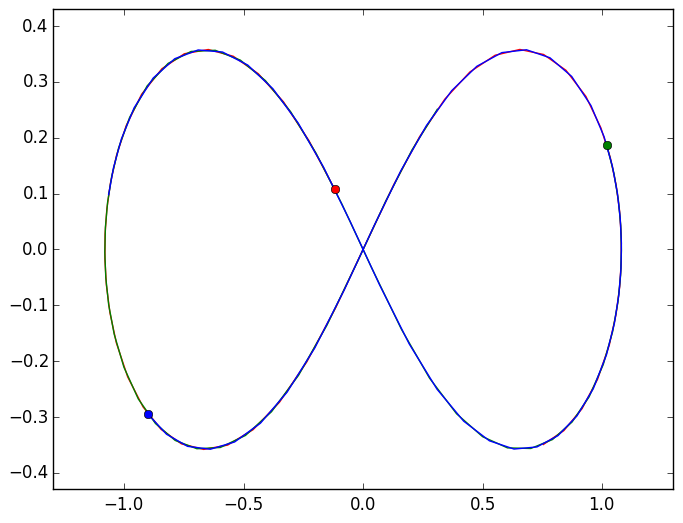

In [12]:
r1x = [x[1] for x in C12[1]]
r2x = [x[1] for x in C22[1]]
r3x = [x[1] for x in C32[1]]
r1y = [x[2] for x in C12[1]]
r2y = [x[2] for x in C22[1]]
r3y = [x[2] for x in C32[1]]

#Todo éste código es para animar de una forma bonita


#Find Axis Limits
xmin = minimum([r1x,r2x,r3x])
xmax = maximum([r1x,r2x,r3x])
xmin, xmax = xmin - 0.1(xmax-xmin), xmax+ 0.1*(xmax-xmin)
ymin = minimum([r1y,r2y,r3y])
ymax = maximum([r1y,r2y,r3y])
ymin, ymax = ymin - 0.1(ymax-ymin), ymax+ 0.1*(ymax-ymin)

#Construct Figure and Plot Data
fig = figure()
ax = plt[:axes](xlim = (xmin,xmax),ylim=(ymin,ymax))
global line1 = ax[:plot]([],[],"r-")[1]
global line2 = ax[:plot]([],[],"g-")[1]
global line3 = ax[:plot]([],[],"b-")[1]
global p1 = ax[:plot]([],[],"or")[1]
global p2 = ax[:plot]([],[],"og")[1]
global p3 = ax[:plot]([],[],"ob")[1]

function init()
    global line1
    global line2
    global line3
    global p1
    global p2
    global p3
    line1[:set_data]([],[])
    line2[:set_data]([],[])
    line3[:set_data]([],[])
    p1[:set_data]([],[])
    p2[:set_data]([],[])
    p3[:set_data]([],[])
    return (line1,line2,line3,p1,p2,p3,None)
end

step = 1
function animate(i)
    k = i + 1
    global line1
    global line2
    global line3
    global p1
    global p2
    global p3    
    line1[:set_data](r1x[max(1,step*(k-50)):(step*k)],r1y[max(1,step*(k-50)):(step*k)])
    line2[:set_data](r2x[max(1,step*(k-50)):(step*k)],r2y[max(1,step*(k-50)):(step*k)])
    line3[:set_data](r3x[max(1,step*(k-50)):(step*k)],r3y[max(1,step*(k-50)):(step*k)])
    p1[:set_data]([r1x[step*k]],r1y[step*k])
    p2[:set_data]([r2x[step*k]],r2y[step*k])
    p3[:set_data]([r3x[step*k]],r3y[step*k])
    return (line1,line2,line3,None)
end

#Call the animator.
myanim = anim.FuncAnimation(fig, animate, init_func=init, frames=ifloor(length(time2)/step), interval=20)

#This will require ffmpeg or equivalent.
myanim[:save]("Ocho.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])

function html_video(filename)
	base64_video = base64(open(readbytes, filename))
	"""<video controls src="data:video/x-m4v;base64,$base64_video">"""
end

display("text/html", html_video("Ocho.mp4"))

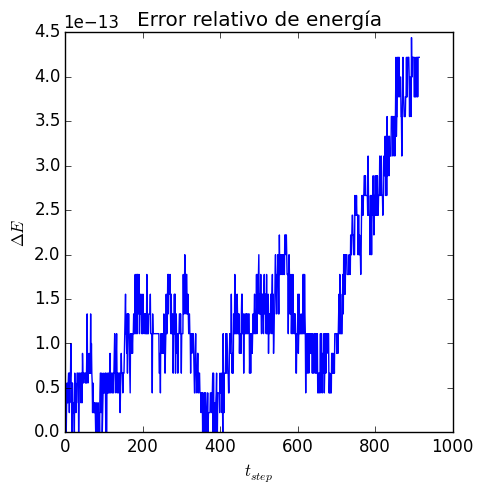

In [13]:
#Ahora, calculemos la energía del sistema a cada paso del tiempo y grafiquemos el error absoluto con respecto al 
#valor de energía para la condición inicial

#Calcula la energía
EC = Energia_3(C12, C22, C32, [1.,1.,1.])
ΔEC = Float64[abs(1 - x/EC[1])*100 for x in EC]
figure(figsize = (5,5))
plot(ΔEC)
title("Error relativo de energía")
xlabel(L"t_{step}")
ylabel(L"\Delta E")
show()

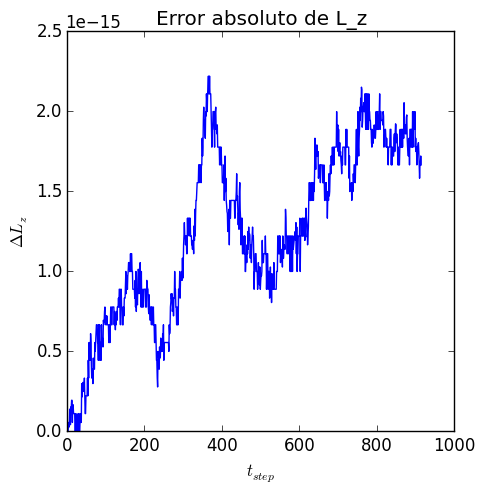

In [12]:
#Ahora, hagamos lo mismo con el momento angular

AM = Angular_3(C12, C22, C32, [1., 1., 1.])
ΔAM = Float64[abs(x[3] - AM[1][3]) for x in AM]
figure(figsize = (5,5))
plot(ΔAM)
title("Error absoluto de L_z")
xlabel(L"t_{step}")
ylabel(L"\Delta L_z")
show()

Notamos que el error absoluto de la energía tiene un orden $\sim 10^{-13}$ y que la componente $z$ del momento angular un orden $\sim 10^{-15}$, el hecho de que el error en la energía tenga un orden de magnitud mayor con respecto a la primera configuración sugeriría que éste sistema es un poco más sensible al cambio de parámetros iniciales, revisemos ésto utilizando el barrido sobre uno de los parámetros

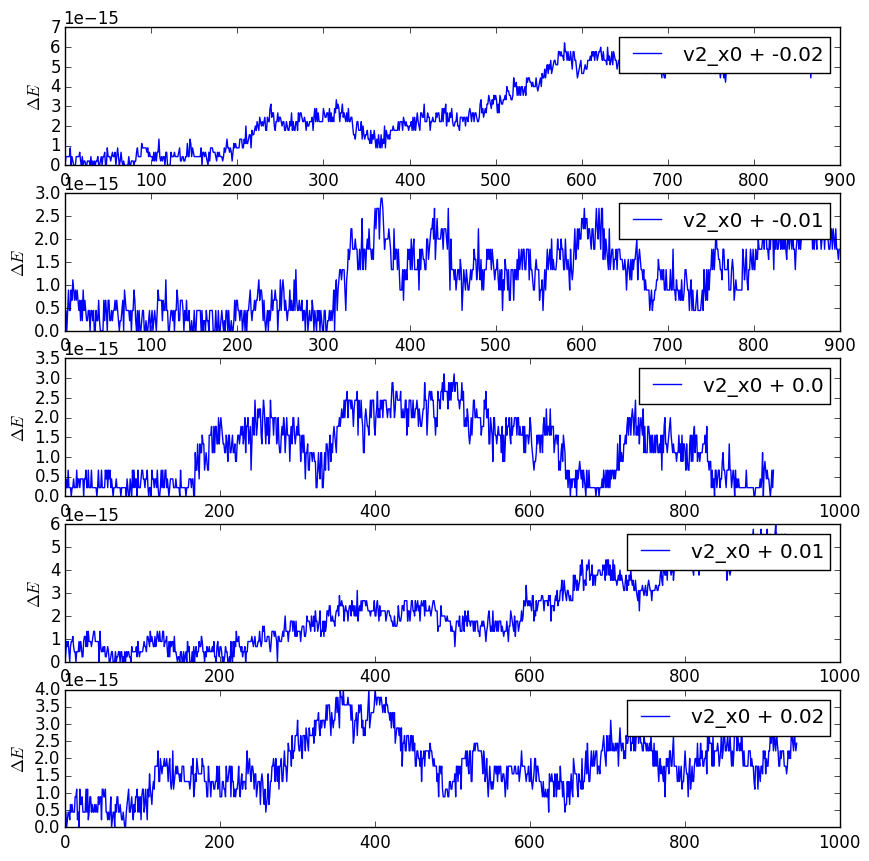

In [13]:
EnergiaTriangulos = []
AngularMomentum = []
Posiciones =[]
Velocidades = []
intervalo = collect(-0.2:0.01:0.2)
prueba1_masas = [1., 1., 1.]
for x in intervalo
    Cuerpo12 = [1., 0.97000436, -0.24308753,0., 0.46620369, 0.43236573,0.]
    Cuerpo22 = [1., 0.,0.,0., -0.93240737 + x, -0.86473146,0.]
    Cuerpo2 = [1, -0.5,sqrt(3)/2,0., sqrt(3)/2 + x, 0.5,0.]
    CondicionesIniciales1 = CalculaCM(Cuerpo12, Cuerpo22, 1.)
    
    ts1, c12, c22, c32 = Integrador3(CondicionesIniciales1, 100.)
    E = Energia_3(c12,c22,c32, prueba1_masas)
    L = Angular_3(c12,c22,c32, prueba1_masas)
    push!(EnergiaTriangulos, E)
    push!(AngularMomentum, L)
    Temp = typeof(c12[1])[c12[1],c22[1],c32[1]]
    Temp2 = typeof(c12[2])[c12[2],c22[2],c32[2]]
    push!(Velocidades, Temp2)
    push!(Posiciones, Temp)
end

ΔE = []
ΔL = []
#Rutina para calcular errores absolutos
for j in 1:length(EnergiaTriangulos)
    E0 = EnergiaTriangulos[j][1]
    
    temp = Float64[abs(E0 - x) for x in EnergiaTriangulos[j]]
    push!(ΔE, temp)
    
    L0 = AngularMomentum[j][1]
    temp2 = Float64[norm(L0 - x) for x in AngularMomentum[j]]
    push!(ΔL, temp2)
end

figure(figsize = (10,10))
for j in 19:23
    subplot(5,1,(j - 18))
    
    plot(ΔE[j], label = "v2_x0 + $(intervalo[j])")
    legend()
    ylabel(L"\Delta E")
end

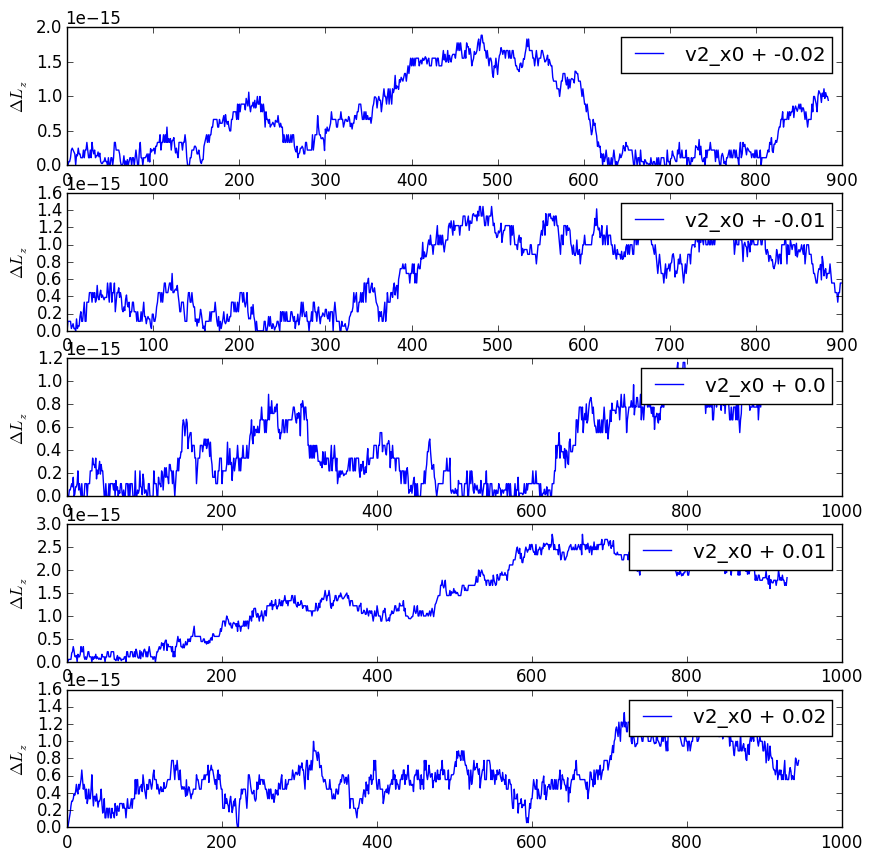

In [14]:
figure(figsize = (10,10))
for j in 19:23
    subplot(5,1,(j - 18))
    plot(ΔL[j], label = "v2_x0 + $(intervalo[j])")
    legend()
    ylabel(L"\Delta L_z")
end

Contrario a lo que se pensó, el sistema no es sensible ante cambios pequeños en uno de los parámetros, por lo que podemos hablar de una estabilidad mayor de ésta configuración

## Última configuración: Sistema Sol - Tierra - Luna

Para el sistema de 3 cuerpos formado por el Sol, la Tierra y la Luna, consideramos una posición inicial colineal, con las distancias equivalentes a las distancias astronómicas reportadas.

Usamos también datos concernientes a las masas.

In [84]:
MasaSol = 2.
MasaTierra = 0.1
MasaLuna = 0.0001

Distancia_TierraSol = 2.0
Distancia_TierraLuna = -0.2
Distancia_LunaSol_inicial= Distancia_TierraSol + Distancia_TierraLuna

VelocidadTraslacional_TierraSol = 1.0
VelocidadTraslacional_TierraLuna = 0.44

PosicionInicialSol = [0., 0., 0.]
PosicionInicialTierra = [Distancia_TierraSol, 0., 0.]
PosicionInicialLuna = [Distancia_LunaSol_inicial, 0., 0.] ;

In [85]:
#Funcion que agrupa condiciones iniciales para pasarlas al integrador
function iniciar(masa, posiciones, velocidades)
    condiciones = [masa, posiciones[1], posiciones[2], posiciones[3], velocidades[1], velocidades[2], velocidades[3]]
    return condiciones
end

iniciar (generic function with 1 method)

In [86]:
#Condiciones Iniciales


CondicionesTierra = iniciar(MasaTierra, PosicionInicialTierra, [0., VelocidadTraslacional_TierraSol, 0.])
CondicionesLuna   = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraLuna, 0.])
#CondicionesSol    = iniciar(MasaSol, PosicionInicialSol, [0., 0., 0.])
#CondicionesIniciales2 = typeof(CondicionesLuna)[CondicionesSol, CondicionesTierra, CondicionesLuna]
CondicionesIniciales2 = CalculaCM(CondicionesTierra, CondicionesLuna, MasaSol)

3-element Array{Array{Float64,1},1}:
 [0.1,2.0,0.0,0.0,0.0,1.0,0.0]                                       
 [0.0001,1.8,0.0,0.0,0.0,0.44,0.0]                                   
 [2.0,-0.10009000000000001,-0.0,-0.0,-0.0,-0.050022000000000004,-0.0]

In [88]:
time3, C13, C23, C33 = Integrador3(CondicionesIniciales2, 100.);

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAFs6xtZGF0AAACoAYF//+c3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0MiAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTQgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz02IGxvb2thaGVhZF90aHJlYWRzPTEgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAACG1liIQAL//+9q78yytHC5UuHVl7s1Hy6Ely/YgwfWgAAAMAAAMAAAMABVHrEQpsXdeGoAAAAwAX4AUVKvus9wBiAZMwTsbaN1vs6SZLa6gGEMlaKuxPaQRv4MuDq93bCB6YoE3gLDXdBv9uGWEZh1LzpR6SHV+YiV0ZyTZd7Kyex2ompQBlWikbbN7wxCzlI1sATGAG3G4ymfq9K7a9AuytcgDlUl4dKdcUA77xv0fHzavGU0S5OFQFxSvHf4mDurq4PbFaZgHppBVs60lMiygmVo8Oikd7RZTjyZsh9vk0JPgtvnKlw/jGOSVSki6pU49PDMFVKyIdcUuZHNCppra451mOt3rGalqmqLOKA1qYIvm5hIfE+9Jt8PCrI9u/ESBpr9jbXBkwINSXWtEjYEz260j9X+9B7Z7F23BTSfC8Pr33HXk2TACggNBWq8cpV7wLB0P6ISsdxWOP2UI7M1kAAAMACxJMAAFInFfq2XDdZateVwQ87Ir11IMNrW1M+7uhC4h+tL7MD32za97GABFX4ryqw/gAAATT1zo1mA73hDX39DND7FnjDgq5wUzR3msWZEDl1zUTxdor7j4nkwKX8STG3HKWnzV2yTfSrq/DryLJznSTle1nXPVLve6Bx5TCBIMwDWIS3cUbqL+M40M7Zve/wCSCvygUeUICf6A97C/AAAADAAADAPjE+7cufU7YV+SE/7sBWQCH2BRhGQ6ZvrQ+7AAAJiOpk0qbQwRh6eFKqNntL9o8cLmh2O2MGuihrcKrZojFFAfS3j8BqI2/bOEMoQcT3r1n54JKbQai+BMxJyTBSgAAVhct9mBdaMPm8YAGHNoRPnc29CzKdIEvAAZ8aUAxW8AybwCGKQH/+swSfI57IQB2aHNHwc9soS8OjXuNdf6YXJYX6ONCNvwFJidiop/MSOWgtw460tifYGrkflXh6scymi5OzZ8dgZCP7Eq5NWYo7CojB6EwRx/wKVObmrPSHiWUSC90p/1VC76JznCXCF3057AAO2/kU/4BpVt33RrxotJlWNJ2Jv/9boUcXm9X6y1m18Gf52fn7+W0JXiuyiewUSHtoKUcreCU0lPPHF/bXmnS6QIX1UpsUSHS8lrDCoeLegWvg0EnSqcn8MW33XuqYqKlGG/6He5c2X9uYOA3PLv+NlvjqfWLXCdI3fwQKyDeH5pxasK6E2LA4adnLvSFBnlr/+nt9a/MxG46SsV20klfCR5b7yEp6V00VAYfzK/5BIE60a04J5NTm82z8omNiosVaJ+LeEVl31H7EfoJYZU+wx3r476MTXBuP4s9SvAwvR6HYdSNXBEvRqCW5vId42HGBPU/FMAyDswDAMP5/xATaVQqp8t8KNE+rseAAGxNgAAAD6FFFSCrV5pA1w8z+FDFX8XrTP5Owt94LlQpx0Xn2EIenMWHkamI/9qQpXI/jGGEB/h5pJ5zsDwpQwKhKnPaJk5MArmVVYLF4u46RmJQEKAAHfI2+Wt5/WDt5ktWRuRFXvJ3Pjqh284PvP4F0qdNZ3nttbtxkjz3HS4oGupJsJrEcweNczwSqyrTZ04fTmAhrkwyuVAADtjLgGmwgLA+7N7ed0xXOJTIKEgW/MPowb9iu5KATYDS+x+YjiW3ADwrZIZSlq0J8gABO9HoJ5161unIRa+0ABuTt0VX4ndj/3yJH/+Cof3BLVOU3HFg8honO1q0KepkvPDueypDS/uufEHW1YEqFuR35iGLr5+POhDq+AYJ0h9EPlPIGY5b9I/RNhjUtIs6Mm+fnLtfmz65Yc6jDHNW6elgAhYiokO9l67biWfZGxdh+FcYT0kGDeDyAAZkRUA1ulgAAGA9QZZcfqio//LHK+qGD5o1hVOQRete9p7LkAu/6ub7mOzk7bAaA4Kf9ImcIKdZmPGY8mqZQGsPHmZjWkHIRqE57/02CU89aD9hCsgq1uxbnSnXZuYf5IlQThk7Yez2ENV4EcsV1Nv7Gv2CBdc0XA3aeDSM49xiqhp6sbJGjH66hbJtuh6w4upozEIHXnLubztNh9eoO2BKcWpgne3r4+/sv/N7Km05VHA/s0mPa0I4gaed4ojHBmtKeTYOWSlGCxrrHHg8WHMZXv66EoVjDPunGUvk5dOnQHn2+jVMzeQeyHFhrTk/p6RSLavehsegAoiPJTStb6U6DvUgh7+TkaGAt61Mes4XVCl+qjZQQ4Pv9RzQM0Plj1okmJrv9oKDGs4KEM7UXx5aWgMZouzJJ63Didn+ahJLqwuuNl15e6ieq6OY/lSi8/FrFnT4RS1bShLs/Y4lTQfJYy/shjvm3KbbytqCoeotyi7TsDEC2PMUHyjDlfRPW7ixfDpq/f/4WgdvZwMEEb+JXrJkXo9iUor4WTBRqvIg9MgWEXYrcNVWt0nfvyuAf0I/tpTCERdJOiZSha14kY4bP/OfyHbbvNHSHV2K5VDWaOn0BlnhfFU8KNoxYicAnHJ/CLukm/sR0dtFs83pxO5L60lmc/Juot7Pe5RiuUaXRevSnp0bBdcBBAggcExQSo7+UM9S0fXstNsSMqsgv10AwkzK3a9kAxiPxRmrpXsfcZd2RaRCfCFR8RrzLRgbmccbNVpH6kmJjOXtCxQML+5VHq6q1B5X3dSFpfJCSWYfmHj7cemiGak/b1qOEYK3jPrqCpl2F2uwaxQ+a/iFvtvdcVete/kUd2EQWSlC/mYKsDmWwlw32pdgDLl8Qylovv7/RA8zjUGCmet6XGXouDRXrVL1sRXsAMfDMsha/MO5JMaow2NJ3SUYJOd6D4uqg8QHTXXL9YgN47xs0zJxXCMiPwcQmkTmn6Bjtg2DCsDJfaRMEtIFE+Auj0mhlpt+4J7JMgCGjFAAAAMAAAMAK2EAAAFLQZokbEL//oywAEQSqcAmu8+jzXdxPPueADpu519gSboRdMKqRrKIJguwJLaHR8X71E8iOQGBM9dA4t0UdzUTIxt2+gXYpVUTH9Sgdh2

  likely near In[89]:65
  likely near In[89]:65
  likely near In[89]:65
in init at In[89]:43
  likely near In[89]:65
in init at In[89]:43
  likely near In[89]:68
  likely near In[89]:68
  likely near In[89]:68
in animate at In[89]:61
  likely near In[89]:68
in animate at In[89]:61


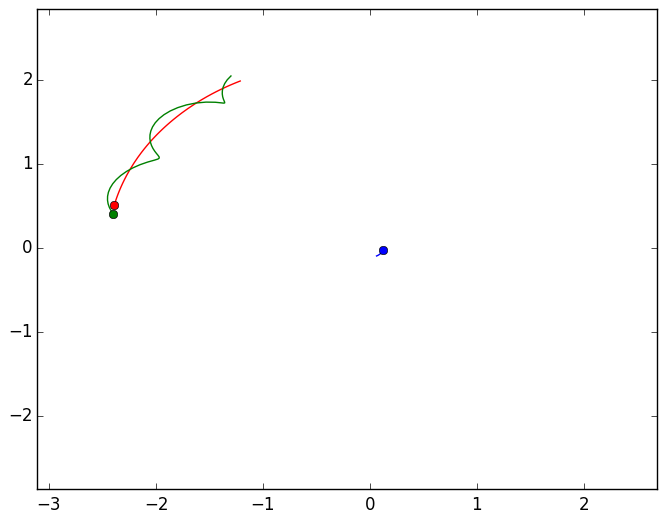

In [89]:

r1x = [x[1] for x in C13[1]]
r2x = [x[1] for x in C23[1]]
r3x = [x[1] for x in C33[1]]
r1y = [x[2] for x in C13[1]]
r2y = [x[2] for x in C23[1]]
r3y = [x[2] for x in C33[1]]

#Todo éste código es para animar de una forma bonita


#Find Axis Limits
xmin = minimum([r1x,r2x,r3x])
xmax = maximum([r1x,r2x,r3x])
xmin, xmax = xmin - 0.1(xmax-xmin), xmax+ 0.1*(xmax-xmin)
ymin = minimum([r1y,r2y,r3y])
ymax = maximum([r1y,r2y,r3y])
ymin, ymax = ymin - 0.1(ymax-ymin), ymax+ 0.1*(ymax-ymin)

#Construct Figure and Plot Data
fig = figure()
ax = plt[:axes](xlim = (xmin,xmax),ylim=(ymin,ymax))
global line1 = ax[:plot]([],[],"r-")[1]
global line2 = ax[:plot]([],[],"g-")[1]
global line3 = ax[:plot]([],[],"b-")[1]
global p1 = ax[:plot]([],[],"or")[1]
global p2 = ax[:plot]([],[],"og")[1]
global p3 = ax[:plot]([],[],"ob")[1]

function init()
    global line1
    global line2
    global line3
    global p1
    global p2
    global p3
    line1[:set_data]([],[])
    line2[:set_data]([],[])
    line3[:set_data]([],[])
    p1[:set_data]([],[])
    p2[:set_data]([],[])
    p3[:set_data]([],[])
    return (line1,line2,line3,p1,p2,p3,None)
end

step = 1
function animate(i)
    k = i + 1
    global line1
    global line2
    global line3
    global p1
    global p2
    global p3    
    line1[:set_data](r1x[max(1,step*(k-50)):(step*k)],r1y[max(1,step*(k-50)):(step*k)])
    line2[:set_data](r2x[max(1,step*(k-50)):(step*k)],r2y[max(1,step*(k-50)):(step*k)])
    line3[:set_data](r3x[max(1,step*(k-50)):(step*k)],r3y[max(1,step*(k-50)):(step*k)])
    p1[:set_data]([r1x[step*k]],r1y[step*k])
    p2[:set_data]([r2x[step*k]],r2y[step*k])
    p3[:set_data]([r3x[step*k]],r3y[step*k])
    return (line1,line2,line3,None)
end

#Call the animator.
myanim = anim.FuncAnimation(fig, animate, init_func=init, frames=ifloor(length(time3)/step), interval=20)

#This will require ffmpeg or equivalent.
myanim[:save]("SolTierraLuna.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])

function html_video(filename)
	base64_video = base64(open(readbytes, filename))
	"""<video controls src="data:video/x-m4v;base64,$base64_video">"""
end

display("text/html", html_video("SolTierraLuna.mp4"))



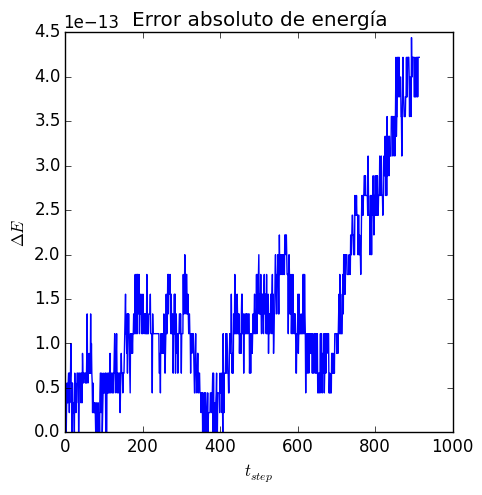

In [45]:
#Ahora, calculemos la energía del sistema a cada paso del tiempo y grafiquemos el error absoluto con respecto al 
#valor de energía para la condición inicial

#Calcula la energía
EC2 = Energia_3(C13, C23, C33, [MasaTierra, MasaLuna, MasaSol])
ΔEC2 = Float64[abs(x - EC[1]) for x in EC]
figure(figsize = (5,5))
plot(ΔEC)
title("Error absoluto de energía")
xlabel(L"t_{step}")
ylabel(L"\Delta E")
show()

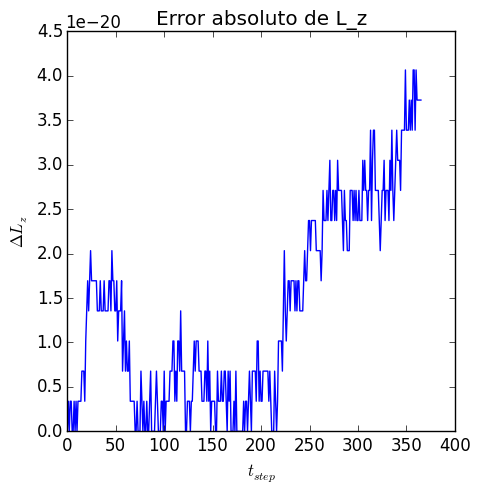

In [46]:
#Ahora, hagamos lo mismo con el momento angular

AM = Angular_3(C13, C23, C33, [MasaTierra, MasaLuna, MasaSol])
ΔAM = Float64[abs(x[3] - AM[1][3]) for x in AM]
figure(figsize = (5,5))
plot(ΔAM)
title("Error absoluto de L_z")
xlabel(L"t_{step}")
ylabel(L"\Delta L_z")
show()

Volvemos el sistema es estable, en el sentido de que cantidades como la energía y el momento angular se conservan, pues el error absoluto de éstas cantidades tienen un orden de magnitud $\sim 10^{-13}$ y $\sim 10^{-16}$ respectivamente

In [47]:
#importamos colores y hacemos un color map que disntiguira a nuestro tercer cuerpo: la Luna

using Colors

#### Vamos a variar las condiciones de la velocidad inicial del Satélite, en el eje Y.
#### Para ello, graficamos las coordenadas obtenidas en X y en Y, asignándoles un colorsegún el parámetro del cual provengan. (El círculo azul marino oscuro al centro corresponde a las posiciones del segundo cuerpo, la Tierra. Como es de esperarse orbita al rededor del Sol.

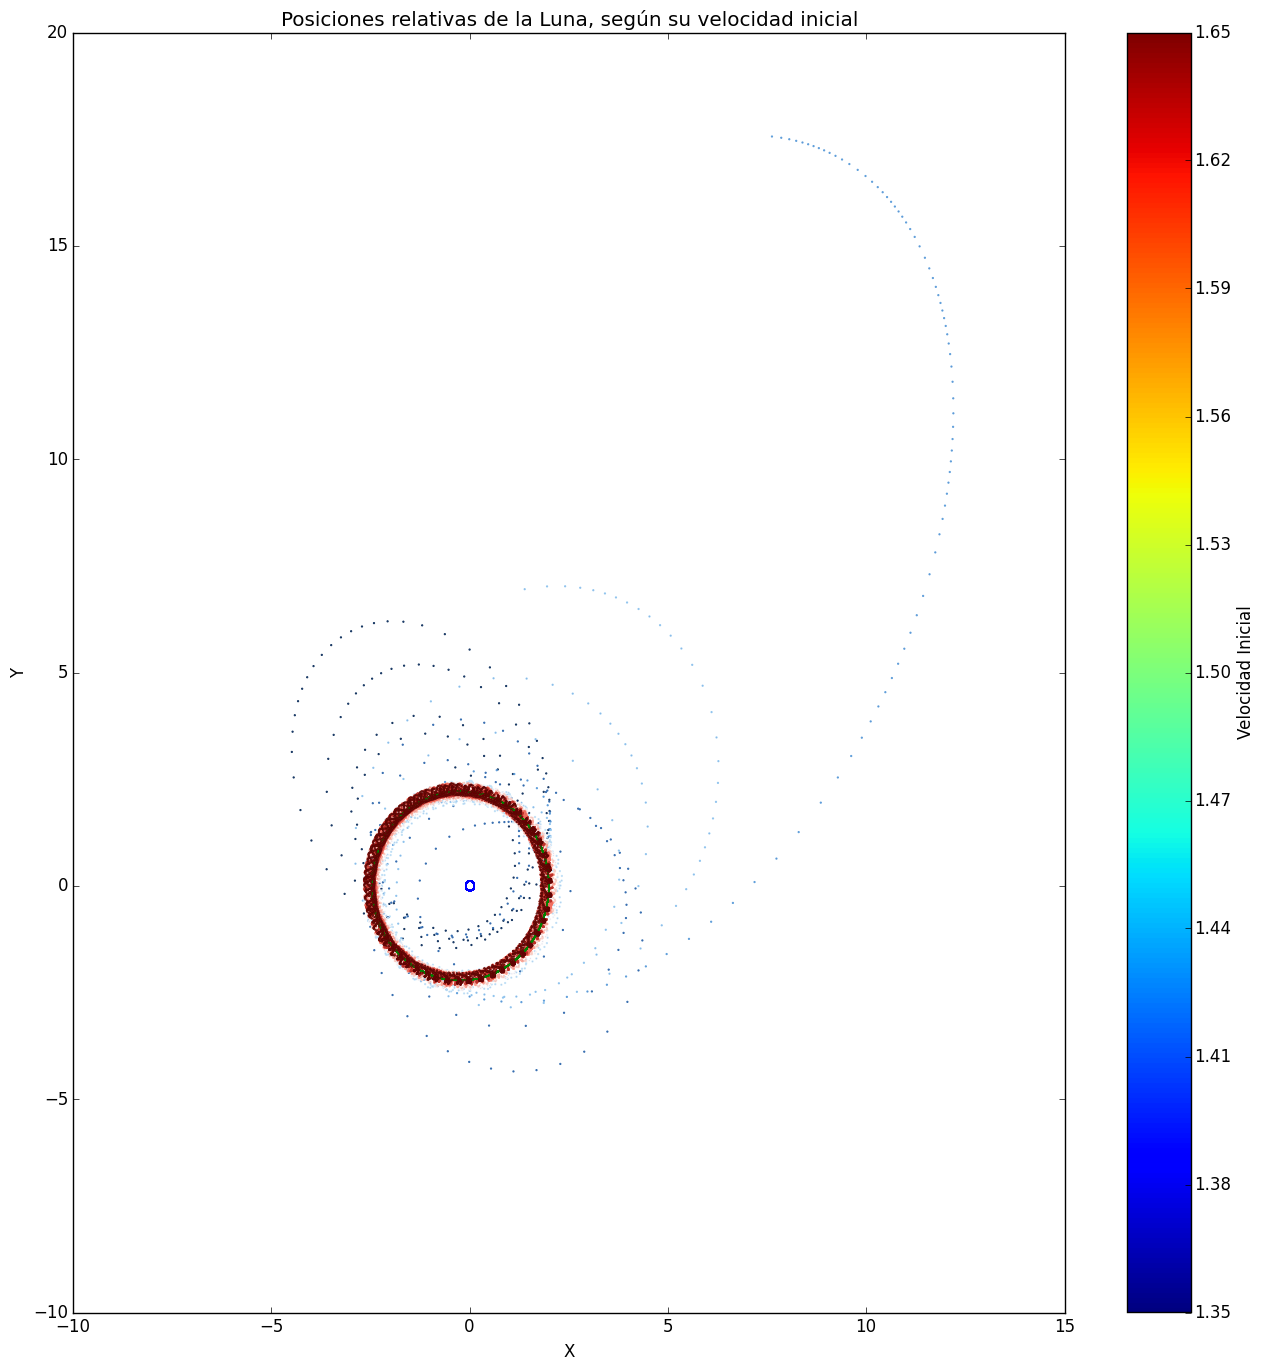

In [145]:
par = [2.0:-0.05:1.5] #definimos un parámetro de variación
paleta_luna = colormap("RdBu", length(par), mid=0.5)

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., par[i], 0.])
    CondicionesIniciales = CalculaCM(CondicionesTierra, CondicionesLuna, MasaSol)
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 100.)
    
    Px1 = Float64[pos[1] for pos in Cuerpo1[1]] 
    Px2 = Float64[pos[1] for pos in Cuerpo2[1]]
    Px3 = Float64[pos[1] for pos in Cuerpo3[1]]
    
    Py1 = Float64[pos[2] for pos in Cuerpo1[1]] 
    Py2 = Float64[pos[2] for pos in Cuerpo2[1]]
    Py3 = Float64[pos[2] for pos in Cuerpo3[1]]

    Pz1 = Float64[pos[3] for pos in Cuerpo1[1]] 
    Pz2 = Float64[pos[3] for pos in Cuerpo2[1]]
    Pz3 = Float64[pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaTierra, MasaLuna, MasaSol])
    
    c_par = [ones(Py2)*par[i]]
    #print(c_par)
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "green", label="Tierra")
    p3=scatter(Px3, Py3, linestyle="-", marker="x", s=0.4, color = "blue", label="S")
    p2=scatter(Px2, Py2, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end
cb = colorbar()
title("Posiciones relativas de la Luna, según su velocidad inicial")
xlabel("X")
ylabel("Y")

cb[:"set_label"]("Velocidad Inicial")

Gráfico en donde vemos que existen valores para los que el satélite escapa, especialmente para valores negativos.
Nos restringimos a valores positivos. El color verde representa la Tierra y el color azul encendido, el Sol. VEmos que ahora gira alrededor de su centro de masa.

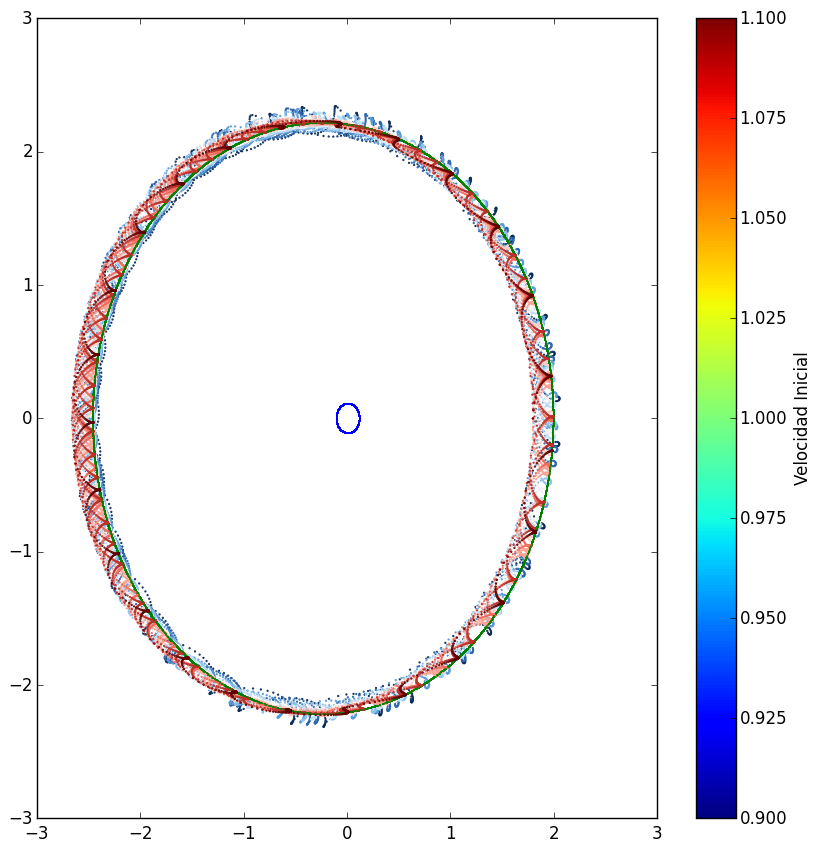

In [146]:
par = [1.5:-0.05:1.0]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(10,10))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., par[i], 0.])
    CondicionesIniciales = CalculaCM(CondicionesTierra, CondicionesLuna, MasaSol)
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 40.)
    
    Px1 = Float64[pos[1] for pos in Cuerpo1[1]] 
    Px2 = Float64[pos[1] for pos in Cuerpo2[1]]
    Px3 = Float64[pos[1] for pos in Cuerpo3[1]]
    
    Py1 = Float64[pos[2] for pos in Cuerpo1[1]] 
    Py2 = Float64[pos[2] for pos in Cuerpo2[1]]
    Py3 = Float64[pos[2] for pos in Cuerpo3[1]]

    Pz1 = Float64[pos[3] for pos in Cuerpo1[1]] 
    Pz2 = Float64[pos[3] for pos in Cuerpo2[1]]
    Pz3 = Float64[pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaTierra, MasaLuna, MasaSol]) 
    c_par = [ones(Py2)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "green", label="Tierra")
    p3=scatter(Px3, Py3, linestyle="-", marker="x", s=0.4, color = "blue", label="S")
    p2=scatter(Px2, Py2, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")

    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

Hacemos un refinamiento...

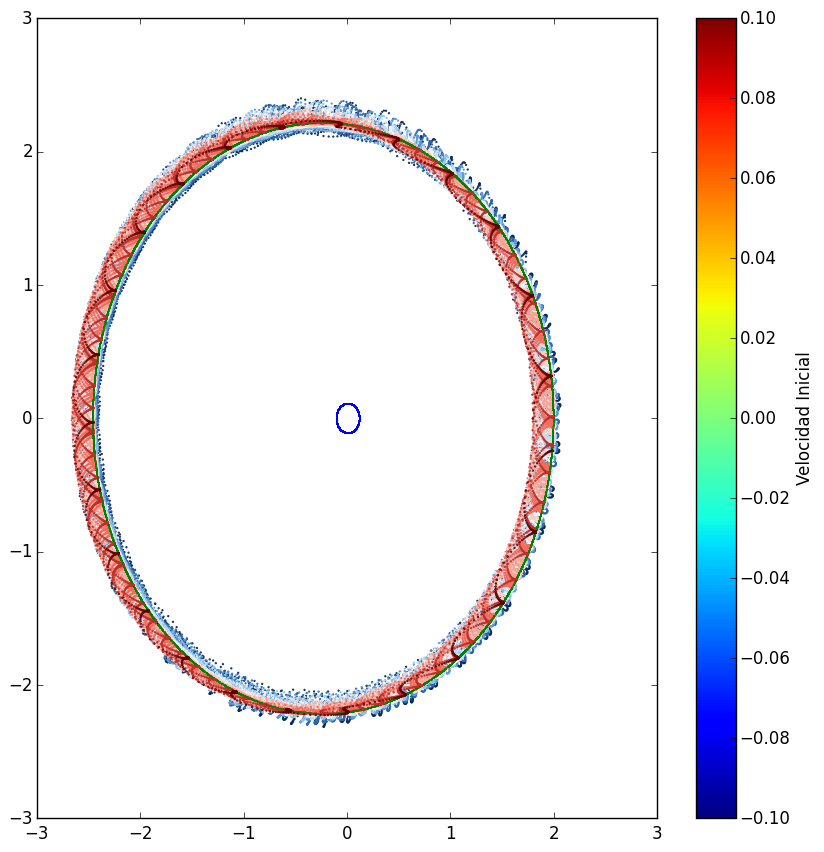

In [148]:
par = [0.5:-0.05:0.0]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(10,10))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = CalculaCM(CondicionesTierra, CondicionesLuna, MasaSol)
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 100.)
    
    Px1 = Float64[pos[1] for pos in Cuerpo1[1]] 
    Px2 = Float64[pos[1] for pos in Cuerpo2[1]]
    Px3 = Float64[pos[1] for pos in Cuerpo3[1]]
    
    Py1 = Float64[pos[2] for pos in Cuerpo1[1]] 
    Py2 = Float64[pos[2] for pos in Cuerpo2[1]]
    Py3 = Float64[pos[2] for pos in Cuerpo3[1]]

    Pz1 = Float64[pos[3] for pos in Cuerpo1[1]] 
    Pz2 = Float64[pos[3] for pos in Cuerpo2[1]]
    Pz3 = Float64[pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaTierra, MasaLuna, MasaSol]) 
    c_par = [ones(Py2)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "green", label="Tierra")
    p3=scatter(Px3, Py3, linestyle="-", marker="x", s=0.4, color = "blue", label="S")
    p2=scatter(Px2, Py2, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

Y observamos que para ciertos valores del parámetro inicial, las posiciones se concentran.
Hacemos un refinamiento más.

## Referencias

- Para darnos idea de si las simulaciones estaban bien, empleamos las condiciones iniciales que se encuentran [aquí](https://phet.colorado.edu/sims/my-solar-system/my-solar-system_en.html).

- Para checar la configuración del "ocho" y tomar algunas cosas de Teoría empleamos el siguiente [pdf](https://www.math.ualberta.ca/~bowman/publications/nbody.pdf).

- Para animar de una forma decente usé el código que hallé [aquí](http://nbviewer.jupyter.org/github/tom26/JuliaFun/blob/master/2D%203-Body%20Problem.ipynb).

In [122]:
reds = get_cmap()

LoadError: LoadError: ArgumentError: function get_cmap does not accept keyword arguments
while loading In[122], in expression starting on line 1

LoadError: LoadError: MethodError: `call` has no method matching call(::PyPlot.ColorMap, ::Int64)
Closest candidates are:
  BoundsError()
  BoundsError(!Matched::Any...)
  DivideError()
  ...
while loading In[119], in expression starting on line 1